In [27]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [28]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import AgglomerativeClustering  

In [29]:
df = pd.read_csv("Tourism_In_India_Statistics_2018-Table_5 - Tourism_In_India_Statistics_2018-Table_5.csv")
df.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,5419608,668403,5663136,794556,4.5,18.9,12.0,6.9
1,Agra Circle,Agra Fort,1799953,441326,2008208,489822,11.6,11.0,11.0,5.0
2,Agra Circle,Akbar's Tomb Sikandara,418502,22389,362070,23638,-13.5,5.6,13.0,12.0
3,Agra Circle,Fatehpur Sikri,427854,126114,962069,301181,124.9,138.8,35.0,37.0
4,Agra Circle,Itimad-ud-Daulah,108392,129177,138524,76572,27.8,-40.7,15.0,9.0


In [30]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns[2:]:
    scaler = StandardScaler()
    scaler.fit(df[[column]])
    df[column] = scaler.transform(df[[column]])

In [31]:
df.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,7.065656,7.293979,6.696790,7.677731,-0.435045,-0.128115,-0.770869,-0.344381
1,Agra Circle,Agra Fort,1.974706,4.714205,1.981703,4.609141,-0.364210,-0.128914,-0.786354,-0.395849
2,Agra Circle,Akbar's Tomb Sikandara,0.031732,-0.045250,-0.141919,-0.085207,-0.614625,-0.129460,-0.755384,-0.206232
3,Agra Circle,Fatehpur Sikri,0.044885,1.133148,0.632118,2.709577,0.766147,-0.115993,-0.414706,0.470971
4,Agra Circle,Itimad-ud-Daulah,-0.404430,1.167946,-0.430307,0.447824,-0.202588,-0.134141,-0.724413,-0.287496


In [32]:
x = df.iloc[:,2: ].values

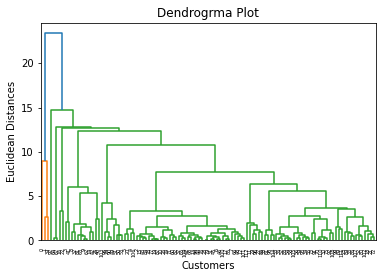

In [33]:
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()

In [34]:
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)

In [35]:
df['clusters'] = y_pred

In [36]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]

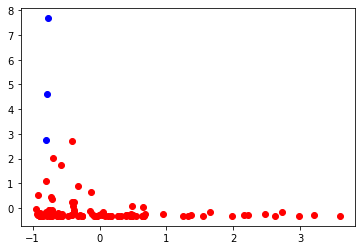

In [37]:
mtp.scatter(df1['Airport(in km)'],df1['Foreign - 2017-18'],c='red')
mtp.scatter(df2['Airport(in km)'],df2['Foreign - 2017-18'],c='blue')